<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Nova York*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="60%" src="https://nycdsa-blog-files.s3.us-east-2.amazonaws.com/2017/10/New-York-City-Brooklyn-Bridge-Panorama-Juergen-Roth-2.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

#*Nova York*

Nova York é uma das principais cidades do Estados Unidos, como codinome de Big Apple, possui diversos prédios espalhados pela cidade, porém com a natureza deslumbrante dentro da cidade que é o Central Park, na qual possui uma área de 3,41 Km², a cidade que nunca dorme, é a cidade mais populosa do país, possui diversas atrações como o Empire State, Times Square, museu de história nacional, entre outros, a cidade possui 5 distritos: Manhattan, The Bronx, Brooklyn, Queens e Staten Island.
<center><img alt="Nova York" width="50%" src="https://destinosnotaveis.com.br/wp-content/uploads/2020/07/times-square-ny-1024x768.jpg"></center>



## Obtenção dos Dados


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-12-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id do imóvel
* `name` - nome da propriedade
* `host_id`- número de id do proprietário (anfitrião)
* `host_name`- nome do proprietário (anfitrião)
* `neighbourhood_group`- grupo do bairro
* `neighbourhood`- bairro do imóvel
* `latitude`- coordenada da latitude da propriedade
* `longitude`- coordenada da longitude da propriedade
* `room_type`- tipo de quarto
* `price`- preço do aluguel
* `minimum_nights`- quantidade mínima de noites para reservar
* `number_of_reviews`- número de reviews
* `last_review`- última data do review
* `reviews_per_month`- reviews por mês
* `calculated_host_listings_count`- quantidade de imóveis do mesmo anfitrião
* `availability_365`- número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,175,30,48,2019-11-04,0.36,2,365
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,74,1,375,2020-11-22,4.97,1,307
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,30,50,2019-12-02,0.36,1,365
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76468,-73.98315,Private room,65,2,474,2020-09-25,3.36,1,0
4,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,75,2,118,2017-07-21,0.86,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

O dataset possui 36923 entradas e 16 variáveis, possui diversos tipos de variáveis, como flloat, inteiro e objetos.

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 36923
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
Através dos valores ausentes do dataset, temos uma dimensão da qualidade do mesmo.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 25% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,02% dos valores nulos.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.254151
last_review                       0.254151
name                              0.000352
host_name                         0.000244
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bfcf258d0>,
      dtype=object)

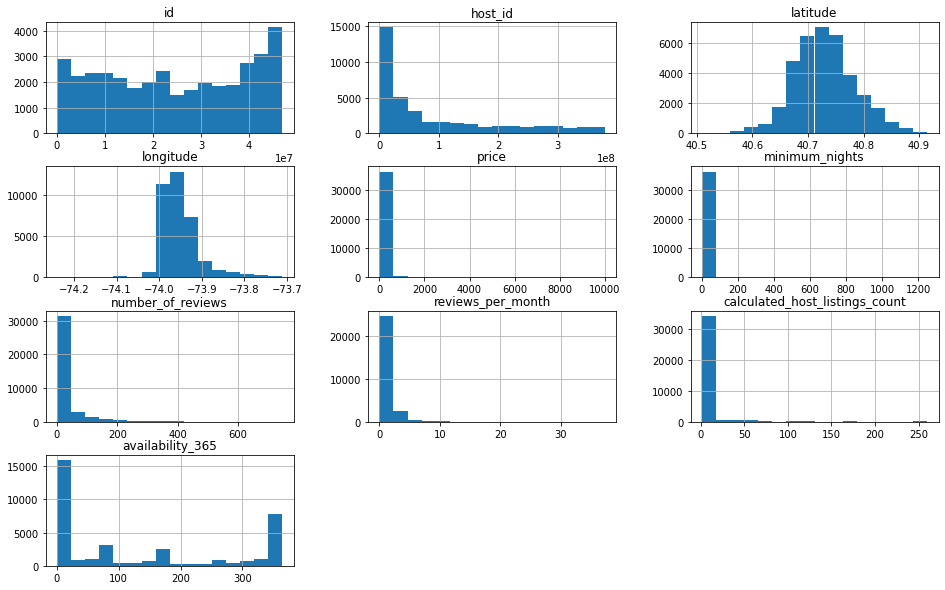

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 16, figsize= (16 , 10))

### **Q4. Há *outliers* presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36923.000000,36923.000000,36923.000000,27539.000000,36923.000000,36923.000000
mean,145.921187,23.674647,23.182298,0.892762,8.947946,134.103513
std,268.388200,26.779132,48.066110,1.305804,31.080929,147.640898
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,61.000000,4.000000,0.000000,0.110000,1.000000,0.000000
50%,100.000000,30.000000,4.000000,0.370000,1.000000,77.000000
75%,159.000000,30.000000,21.000000,1.170000,2.000000,313.000000
max,10000.000000,1250.000000,748.000000,37.280000,260.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 160 e seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 noites, chegando ao valor máximo de 1250.
* A quantidade de `reviews per month`, possui valor máximo de 37.

#### Boxplot para minimum_nights, reviews per month e price

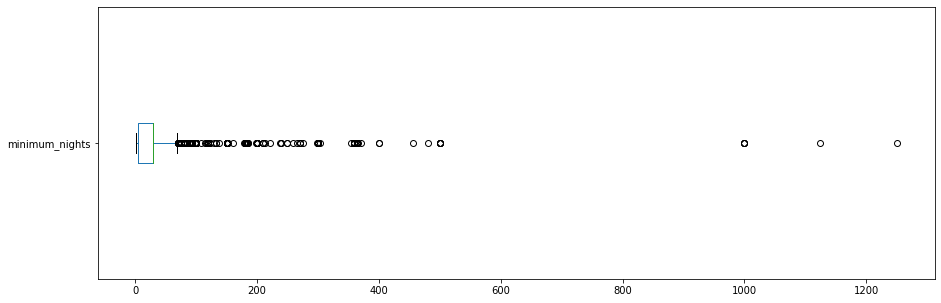

minimum_nights: valores acima de 365:
17 entradas
0.0460% de valores acima de 365


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

# ver quantidade de valores acima de 365 noites para minimum_nights
print("minimum_nights: valores acima de 365:")
print("{} entradas".format(len(df[df.minimum_nights > 365])))
print("{:.4f}% de valores acima de 365".format((len(df[df.minimum_nights > 365]) / df.shape[0])*100))

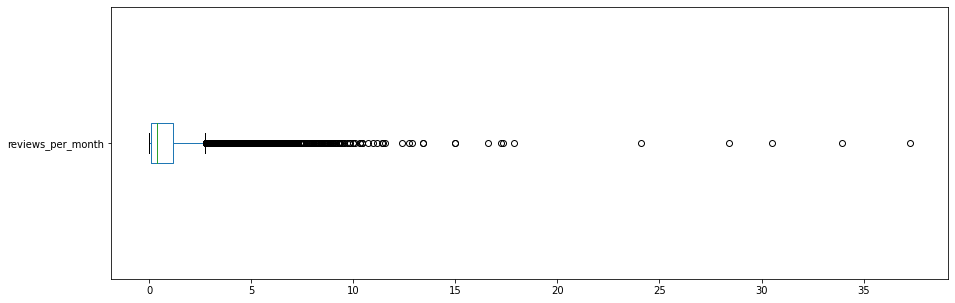

reviews per month: valores acima de 30:
3 entradas
0.0081% de valores acima de 30


In [10]:
# reviews per month
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 5))
plt.show()

# ver quantidade de valores acima de 30 dias para reviews per month
print("reviews per month: valores acima de 30:")
print("{} entradas".format(len(df[df.reviews_per_month > 30])))
print("{:.4f}% de valores acima de 30".format((len(df[df.reviews_per_month > 30]) / df.shape[0])*100))

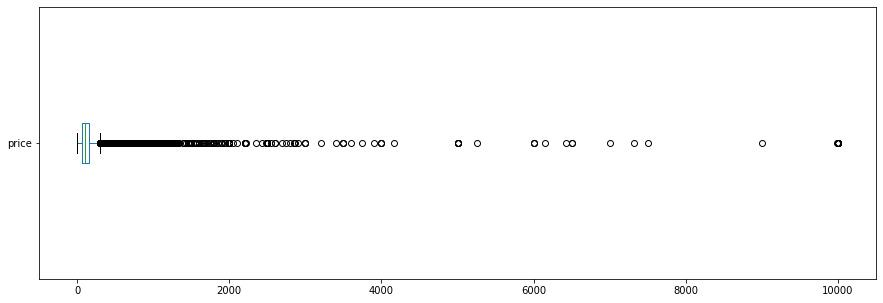


price: valores acima de 1250
176 entradas
0.4767%


In [11]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 5),)
plt.show()

# ver quantidade de valores acima de 1250 para price
print("\nprice: valores acima de 1250")
print("{} entradas".format(len(df[df.price > 1250])))
print("{:.4f}%".format((len(df[df.price > 1250]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,5));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price`,`minimum_nights` e `reviews per month`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

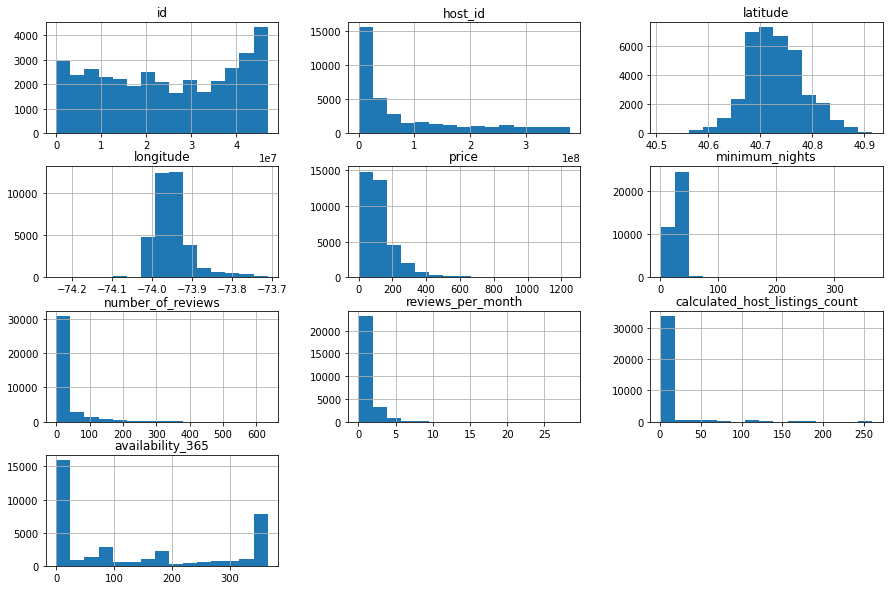

In [12]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1250].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [13]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.007390,-0.049465,-0.053145,-0.009009,0.063043
minimum_nights,0.007390,1.000000,-0.156755,-0.267613,0.059650,-0.026585
number_of_reviews,-0.049465,-0.156755,1.000000,0.709519,-0.100295,0.148701
reviews_per_month,-0.053145,-0.267613,0.709519,1.000000,-0.062993,0.202247
calculated_host_listings_count,-0.009009,0.059650,-0.100295,-0.062993,1.000000,0.184560
availability_365,0.063043,-0.026585,0.148701,0.202247,0.184560,1.000000


### **Q5. Qual a correlação existente entre as variáveis**
A maior correlação entre as variáveis são entre `reviews_per_month` e `number_of_reviews`, aproximadamente 70% 

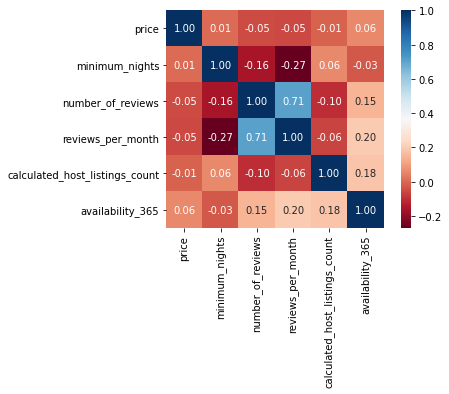

In [14]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual a média dos preços de aluguel?**

A média do preço do aluguel diário é de US$ 145,92.

In [15]:
# ver a média da coluna `price`
df['price'].mean()

145.92118733580696

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**
Através da contagem da variável `room_type`, o imóvel mais alugado é a casa/apartamento inteiro e também o que possue maior porcentagem de disponibilidade (52%) em relação aos restantes tipos de imóveis 

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19339
Private room       16426
Shared room          674
Hotel room           288
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.526561
Private room       0.447246
Shared room        0.018352
Hotel room         0.007842
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Nova York?**
O bairro mais caro é de Fort Wadsworth, porém possui somente um imóvel no Airbnb.


In [18]:
# Média de preços por bairro
print("Preço dos 10 bairros mais caros de Nova York")
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

Preço dos 10 bairros mais caros de Nova York


neighbourhood
Fort Wadsworth      800.000000
Prince's Bay        397.500000
Neponsit            350.000000
Willowbrook         309.000000
Tottenville         309.000000
Tribeca             298.891566
Belle Harbor        258.500000
Woodrow             255.000000
SoHo                253.261649
Theater District    243.878289
Name: price, dtype: float64

In [19]:
# Ver a disponibilidade do imóvel Fort Wadsworth
print(df_clean[df_clean.neighbourhood == "Fort Wadsworth"].shape)

# Ver a entrada do imóvel Fort Wadsworth
df_clean[df_clean.neighbourhood == "Fort Wadsworth"]

(1, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15561,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59528,-74.06277,Entire home/apt,800,30,0,NaN,NaN,5,365


Outro contexto interessante que pode ser analisado neste dataframe, é os valores por distrito, que são denominados como boroughs, no guia oficial de nova york explica os cinco distritos da cidade, a variável do dataframe é o  `neighbourhood_group`. A seguir, vamos ver a quantidade de imóveis por distrito e seus respectivos preços.

O distrito de Manhattan é considerado o distrito mais caro, com um preço de US$165,00 a diária, a região possui os maiores atrativos da cidade, como o museu de arte metropolitano de arte, Central Park, além de escolas privadas e a universidade de nova york. 

In [28]:
#Quantidade de imóveis por distrito
print("Quantidade de imóveis por distrito de Nova York")
df_clean.neighbourhood_group.value_counts()

Quantidade de imóveis por distrito de Nova York


Manhattan        16503
Brooklyn         14403
Queens            4610
Bronx              935
Staten Island      276
Name: neighbourhood_group, dtype: int64

In [29]:
# Média de preços por distrito
print("Preço dos distritos mais caros de Nova York")
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

Preço dos distritos mais caros de Nova York


neighbourhood_group
Manhattan        163.040175
Brooklyn         115.158300
Staten Island    110.851449
Queens            93.612148
Bronx             89.017112
Name: price, dtype: float64

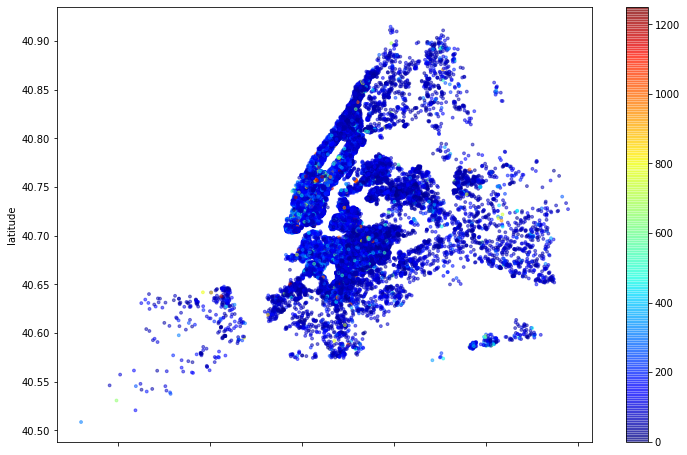

In [21]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));  

De acordo com a plotagem e a interpretação da localização dos distritos pelo mapa, as maiores concentrações estão nos distritos de Manhattan e Brooklyn.

 <center><img alt="Analisando Airbnb" width="40%" src="https://upload.wikimedia.org/wikipedia/commons/3/34/5_Boroughs_Labels_New_York_City_Map.svg"></center>



### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média de noites para alugar é de 23 noites.

In [22]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

23.338252511776076

## Conclusões

Através da análise dos dados de Airbnb da cidade querida de Nova York, concluiu - se que:

* O dataset possui 36923 entradas.
* A variável `price` possui valor máximo é 10000.
* As variáveis `price`, `minimium_nights` e `reviews_per_month` possuem outliers.
* As variáveis `reviews_per_month` e `number_of_reviews` possuem aproximadamente 70% de correlação.
* A média do preço do aluguel diário é de US$145,92.
* A maior disponibilidade dos imóveis é de 52%.
* O bairro Fort Wadsworth é o bairro mais caro, porém possue somente um imóvel no Airbnb.
* Os distritos que possuem maior quantidade de imóveis são o distrito de Manhattan e Brooklyn.